# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import itertools

# Read the Data

In [2]:
data = pd.read_csv(r'C:\Users\Prabhu\Downloads\Paper1\MonthWiseMarketArrivals_Clean.csv')
data = data.loc[data.market == 'MUMBAI' , :]
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


# Data Types and Dimensions

In [3]:
data.shape

(146, 10)

In [4]:
data.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,2009.589041,221721.308219,900.842466,1316.945205,1114.452055
std,3.522678,40792.800998,730.909209,1019.072444,883.113380
min,2004.000000,131590.000000,215.000000,335.000000,287.000000
25%,2007.000000,195125.000000,434.500000,647.750000,544.500000
50%,2010.000000,222220.000000,691.500000,982.500000,846.500000
75%,2013.000000,246050.000000,1098.750000,1623.250000,1391.500000
max,2016.000000,413681.000000,4005.000000,5517.000000,4714.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 6654 to 6799
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    146 non-null    object
 1   month     146 non-null    object
 2   year      146 non-null    int64 
 3   quantity  146 non-null    int64 
 4   priceMin  146 non-null    int64 
 5   priceMax  146 non-null    int64 
 6   priceMod  146 non-null    int64 
 7   state     146 non-null    object
 8   city      146 non-null    object
 9   date      146 non-null    object
dtypes: int64(5), object(5)
memory usage: 12.5+ KB


In [6]:
data['date'].min(),data['date'].max()

('April-2004', 'September-2015')

In [7]:
data = data.loc[data.market=='MUMBAI']
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


# Setting Date as Index

In [8]:
data = data.groupby('date')['priceMod'].sum().reset_index()

In [9]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date',inplace=True)
data.index

DatetimeIndex(['2004-04-01', '2005-04-01', '2006-04-01', '2007-04-01',
               '2008-04-01', '2009-04-01', '2010-04-01', '2011-04-01',
               '2012-04-01', '2013-04-01',
               ...
               '2006-09-01', '2007-09-01', '2008-09-01', '2009-09-01',
               '2010-09-01', '2011-09-01', '2012-09-01', '2013-09-01',
               '2014-09-01', '2015-09-01'],
              dtype='datetime64[ns]', name='date', length=146, freq=None)

In [10]:
data.head()

,priceMod
date,
2004-04-01,397
2005-04-01,328
2006-04-01,290
2007-04-01,531
2008-04-01,418


# Plot for Mumbai region PriceMod Vs Date 

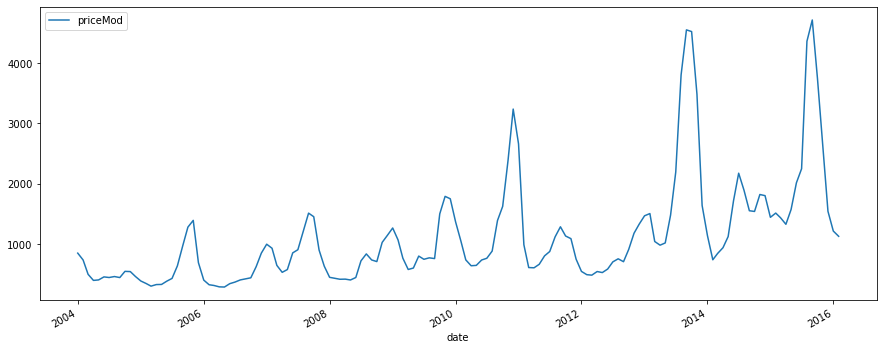

In [11]:
data.plot(figsize=(15, 6))
plt.show()

In [12]:
y=data['priceMod'].resample('MS').mean()
y

date
2004-01-01     849
2004-02-01     736
2004-03-01     498
2004-04-01     397
2004-05-01     405
              ... 
2015-10-01    3748
2015-11-01    2623
2015-12-01    1542
2016-01-01    1215
2016-02-01    1128
Freq: MS, Name: priceMod, Length: 146, dtype: int64

# Decomposing of Data

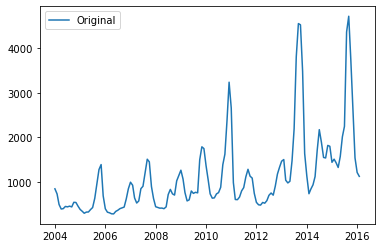

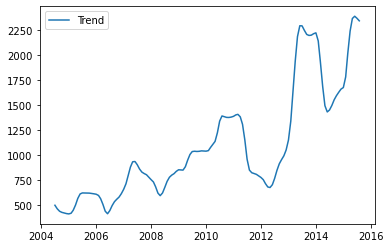

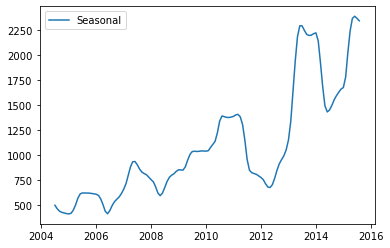

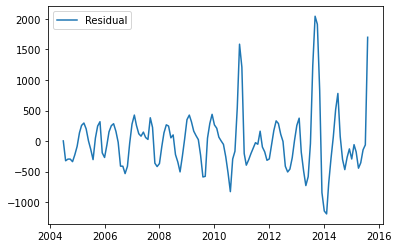

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y,label = 'Original')
plt.legend(loc = 'best')

trend =decomposition.trend
plt.show()
plt.plot(trend,label = 'Trend')
plt.legend(loc = 'best')

sesonal = decomposition.seasonal
plt.show()
plt.plot(trend,label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual,label='Residual')
plt.legend(loc = 'best')

# Performing Adfuller Test

In [14]:

from statsmodels.tsa.stattools import adfuller

result = adfuller(y)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' %(key,value))

ADF Statistic: -4.437736
p-value: 0.000254
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578


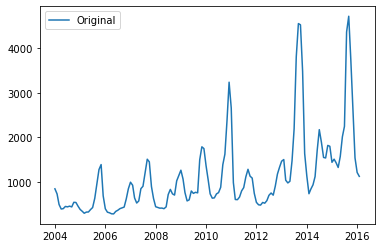

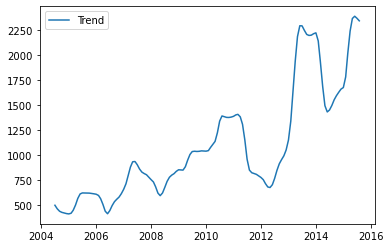

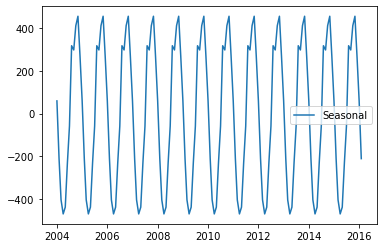

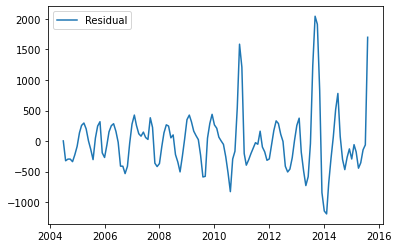

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y,label = 'Original')
plt.legend(loc='best')

trend = decomposition.trend
plt.show()
plt.plot(trend,label='Trend')
plt.legend(loc='best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal,label = 'Seasonal')
plt.legend(loc='best')

residual=decomposition.resid
plt.show()
plt.plot(residual,label = 'Residual')
plt.legend(loc='best')

# Arima Model 

In [16]:
#ARIMA
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} X {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} X {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} X {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} X {}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) X (0, 0, 1, 12)
SARIMAX: (0, 0, 1) X (0, 1, 0, 12)
SARIMAX: (0, 1, 0) X (0, 1, 1, 12)
SARIMAX: (0, 1, 0) X (1, 0, 0, 12)


In [17]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results=mod.fit()
            print('ARIMA{}X{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)X(0, 0, 0, 12)12 - AIC:2519.085107946781
ARIMA(0, 0, 0)X(0, 0, 1, 12)12 - AIC:2283.569163389691
ARIMA(0, 0, 0)X(0, 1, 0, 12)12 - AIC:2212.472853624585
ARIMA(0, 0, 0)X(0, 1, 1, 12)12 - AIC:1975.019361747873
ARIMA(0, 0, 0)X(1, 0, 0, 12)12 - AIC:2227.249976187957
ARIMA(0, 0, 0)X(1, 0, 1, 12)12 - AIC:2136.7087142412565
ARIMA(0, 0, 0)X(1, 1, 0, 12)12 - AIC:1967.4547709399012
ARIMA(0, 0, 0)X(1, 1, 1, 12)12 - AIC:1953.1709526101324
ARIMA(0, 0, 1)X(0, 0, 0, 12)12 - AIC:2327.344273572061
ARIMA(0, 0, 1)X(0, 0, 1, 12)12 - AIC:2116.637164627473
ARIMA(0, 0, 1)X(0, 1, 0, 12)12 - AIC:2071.555118654655
ARIMA(0, 0, 1)X(0, 1, 1, 12)12 - AIC:1842.8263198906461
ARIMA(0, 0, 1)X(1, 0, 0, 12)12 - AIC:2097.1113983162127
ARIMA(0, 0, 1)X(1, 0, 1, 12)12 - AIC:2001.2856375576714
ARIMA(0, 0, 1)X(1, 1, 0, 12)12 - AIC:1852.1305513623538
ARIMA(0, 0, 1)X(1, 1, 1, 12)12 - AIC:1822.3828044506863
ARIMA(0, 1, 0)X(0, 0, 0, 12)12 - AIC:2159.385208595888
ARIMA(0, 1, 0)X(0, 0, 1, 12)12 - AIC:1992.607671237757
AR

In [18]:
mod = sm.tsa.statespace.SARIMAX(y,order=(1,1,1),
                               seasonal_order = (1,1,1,12),
                               
                               enforce_invertibilty=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0447      0.114      0.391      0.696      -0.180       0.269
ma.L1          0.5274      0.106      4.959      0.000       0.319       0.736
ar.S.L12      -0.5328      0.069     -7.766      0.000      -0.667      -0.398
ma.S.L12      -0.4546      0.118     -3.854      0.000      -0.686      -0.223
sigma2       1.23e+05   1.02e+04     12.052      0.000    1.03e+05    1.43e+05


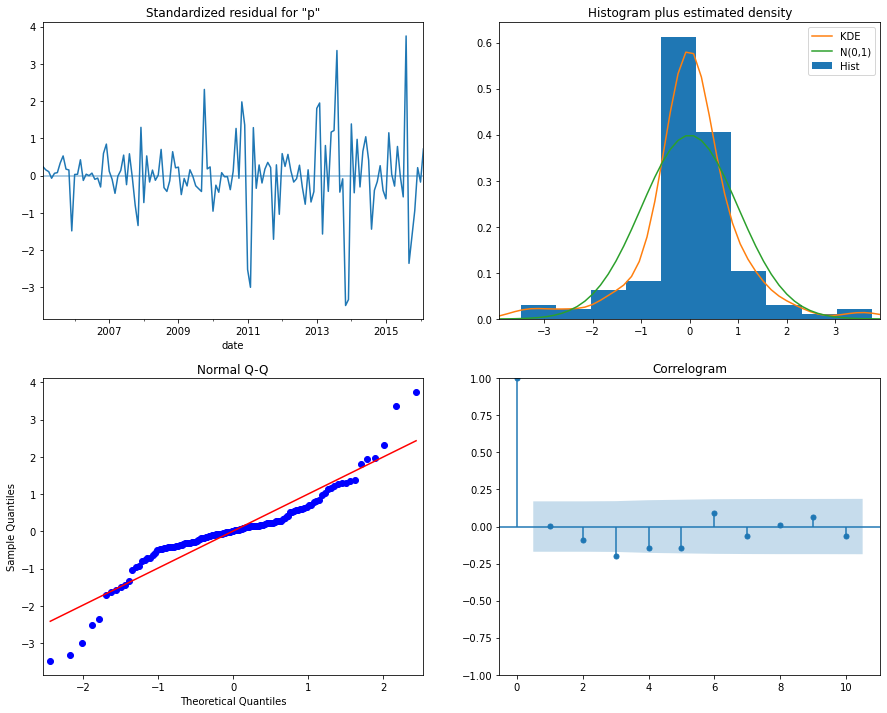

In [19]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

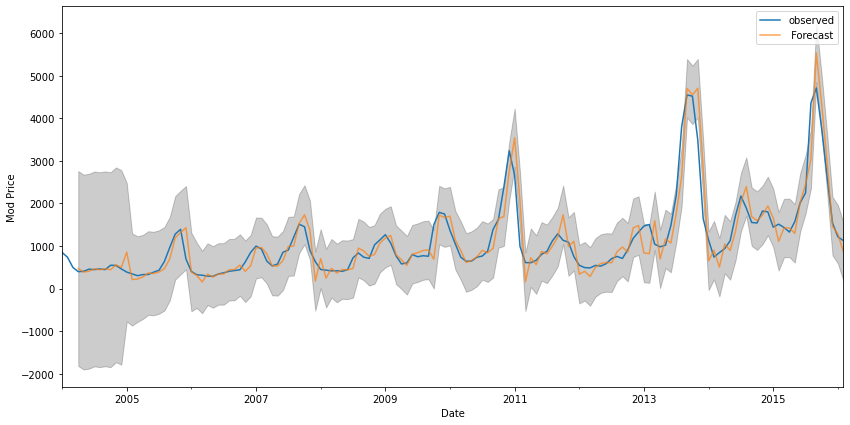

In [21]:
pred = results.get_prediction(start=pd.to_datetime('2004-04-01'),dynamic=False)
pred_ci = pred.conf_int()
ax=y['2004':].plot(label = 'observed')
pred.predicted_mean.plot(ax=ax,label=' Forecast',alpha=0.7,figsize=(14,7))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Mod Price')
plt.legend()
plt.show

In [23]:
y_forecasted = pred.predicted_mean
y_truth = y['2004-04-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecast is {}'.format(round(mse,2)))
print("The Root Mean Squared Error of our forecast is {}".format(round(np.sqrt(mse),2)))


The Mean Squared Error of our forecast is 117748.89
The Root Mean Squared Error of our forecast is 343.15


# Prediction forecast for the model

            lower priceMod  upper priceMod
2016-03-01      494.233577     1868.753959
2016-04-01      -55.754048     2505.226191
2016-05-01     -348.534407     3025.052596
2016-06-01     -219.333139     3806.888811
2016-07-01      -56.306377     4530.647502
2016-08-01      -15.560229     5070.680269
2016-09-01     -222.971946     5317.744571
2016-10-01     -430.502705     5530.137920
2016-11-01     -694.829569     5658.038588
2016-12-01    -1336.405716     5385.843236
2017-01-01    -1843.586267     5228.777420
2017-02-01    -2112.983811     5292.961452
2017-03-01    -2356.319403     5373.763058
2017-04-01    -2553.460226     5490.440047
2017-05-01    -2521.087808     5824.956779


<function matplotlib.pyplot.show(close=None, block=None)>

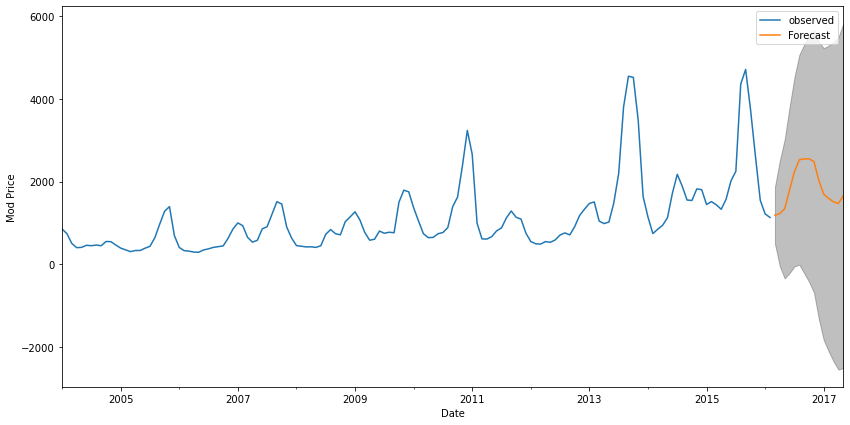

In [24]:
pred_uc = results.get_forecast(steps=15)
pred_ci = pred_uc.conf_int()
ax=y.plot(label='observed',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Mod Price')
print(pred_ci)
plt.legend()
plt.show